# 01: Introduction and Visualisation

Jupyter **cheat-sheet**: https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

## Importing fundamental packages

### NumPy 
  * Package for fast "scientific" computing (especially linear algebra and random numbers capabilities).
  * Mostly an interface to fast C/C++/Fortran libraries.
  * http://www.numpy.org/

### pandas
  * Popular data analysis toolkit.
  * Helps to easily manipulate with **tabular** data.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Data science tools and methods in Python.
  * Built on NumPy, [SciPy](https://www.scipy.org/), and matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Fundamental 2D plotting library.
  * https://matplotlib.org/

### seaborn
  * Data visualisation tool based on matplotlib.
  * https://seaborn.pydata.org/

In [2]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Basic data manipulations using pandas

  - Load data1.csv and data2.csv using pandas.
  - Find out types of data in all columns (do they contain strings, numbers, ...? And how variable are these?)

### Loading data

  - Load data from the csv files to the pandas DataFrame.

In [18]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv', sep=';')

### Using pandas functions to get a basic overview of a dataset

In [36]:
#display(data1.head(2))
#display(data2.head(2))
#display(data1.info())
display(data1.describe())
#display(data1.isnull())
#display(data1.isnull().sum())
#display(data1.head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,759.000000,759.000000,759.000000,606.000000,759.000000,759.000000,759.000000
mean,380.000000,0.388669,2.299078,29.896733,0.520422,0.375494,33.248341
std,219.248717,0.487769,0.835484,14.553021,1.043534,0.804001,52.110573
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,190.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,380.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,569.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,759.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Basics of data selection 

In [64]:
#data1['Age'] # the collumn with pandas.Series.name = 'Age'
#data1.Age # dtto
#data1['Age'][:10] # get first 10 entries of the column Age
#data1['Age'][:3][[True, False, True]]
#data1['Age'] > 30 # applying condition on on all entries of the series -> series containg the results (True/False)
#data1[(data1.Age > 30) & (data1.Survived == 1)] # series containing only people older that 30
data1[['Age', 'Survived']].head() # selecting only given columns
#jmena sloupcu jsou nutna, cisla jedou pres radky
data1_tmp = data1.copy() # make a deep copy of the dataframe
data1_tmp.columns = range(12) # renaming columns
display(data1_tmp.head())
data1_tmp[[1,2]]
#data1_tmp.head()
data1.iloc[:2,0:3] # geting the first row
data1.loc[:2,['Age', 'Sex']] # indexer (see .loc? and .iloc?)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female


## Task 01: Concatenating data

  - Append data2.csv to data1.csv:
      - Data (columns) not present in data1.csv are omitted from data2.csv.
      - Calculate the Age using the BirthYear column in data2.csv and append the result to the Age column of data1.
      - PasangerId must be unique in the resulting data frame. 
      - Use pandas.concat method.

In [85]:
### your code goes here
display(data1.info())
display(data2.info())
data2tmp = data2.copy()
#display(data2.BirthYear.max())
data2tmp["Age"] = 1912 - data2.BirthYear
data2tmp = data2tmp[[col for col in data2tmp.columns if col in data1]]
data = pd.concat([data1, data2tmp])
data.head()

display(data.info())




#display([i for i in data2.columns if i not in data1.columns])
#out = data1.append(data2, sort=False)
#out.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 12 columns):
PassengerId    759 non-null int64
Survived       759 non-null int64
Pclass         759 non-null int64
Name           759 non-null object
Sex            759 non-null object
Age            606 non-null float64
SibSp          759 non-null int64
Parch          759 non-null int64
Ticket         759 non-null object
Fare           759 non-null float64
Cabin          175 non-null object
Embarked       758 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 71.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
Unnamed: 0     132 non-null int64
PassengerId    132 non-null int64
Survived       132 non-null int64
Pclass         132 non-null int64
Name           132 non-null object
Sex            132 non-null object
BirthYear      108 non-null float64
FootSize       132 non-null int64
SibSp          132 non-null int64
Parch          132 non-null int64
Ticket         132 non-null object
Fare           132 non-null float64
Cabin          29 non-null object
Embarked       131 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 14.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 131
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


None

## Plotting with pandas and seaborn

In [86]:
import matplotlib.pyplot as plt # standard convention for importing the plotting tool
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

### Influence of Pclass, Age and Sex on passangers chances

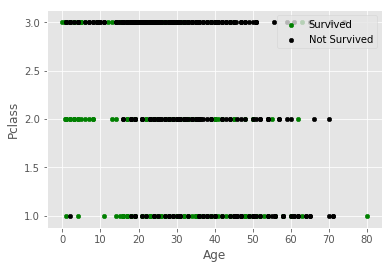

In [90]:
#data.plot() # default behaviour of the plot() method
# look especially on what kinds of plots are available:
#data.plot?

# get data frames for survived and not-survived passangers
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

ax = survived.plot.scatter(x='Age', y='Pclass', color='Green', label='Survived')
#not_survived.plot(x='Age', y='Pclass', kind='scatter', color='Black', label='Not Survived')
# plot the graphs into one figure:
not_survived.plot.scatter(x='Age', y='Pclass', color='Black', label='Not Survived', ax = ax)

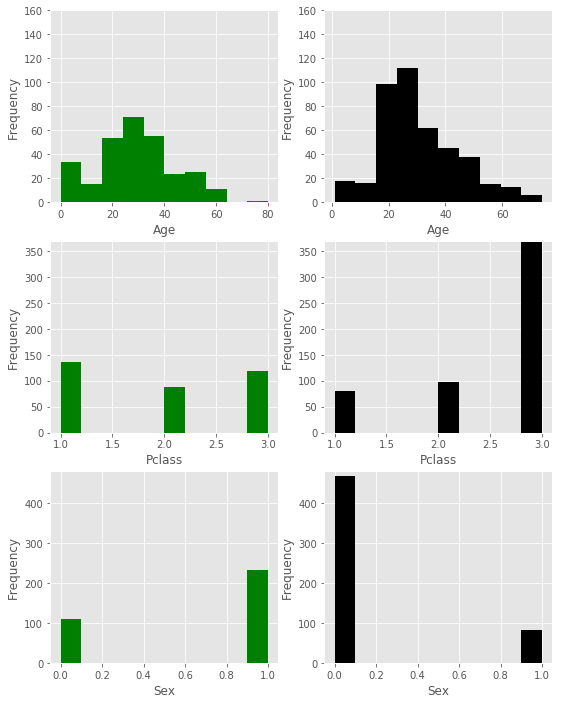

In [91]:
plt.figure(figsize=(9,12)) # figsize in inches
plt.subplot(321) # three rows and two columns, put the following plot into the first slot
plt.xlabel('Age')
plt.ylim((0,160))
survived['Age'].plot.hist(color='Green')
plt.subplot(322)
plt.ylim((0,160))
plt.xlabel('Age')
not_survived['Age'].plot.hist(color='Black')
plt.subplot(323)
plt.ylim((0,370))
plt.xlabel('Pclass')
survived['Pclass'].plot.hist(color='Green')
plt.subplot(324)
plt.ylim((0,370))
plt.xlabel('Pclass')
not_survived['Pclass'].plot.hist(color='Black')
plt.subplot(325)
plt.ylim((0,480))
plt.xlabel('Sex')
survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green')
plt.subplot(326)
plt.ylim((0,480))
plt.xlabel('Sex')
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black')

## Seaborne: investigating relations between features

               Age      Fare     Parch    Pclass       Sex     SibSp  Survived
Age       1.000000 -0.104007 -0.189056 -0.369388 -0.093223 -0.308126 -0.077128
Fare     -0.104007  1.000000  0.159925  0.084197  0.026989  0.116760 -0.027145
Parch    -0.189056  0.159925  1.000000  0.018443  0.245489  0.414838  0.081629
Pclass   -0.369388  0.084197  0.018443  1.000000 -0.131900  0.083081 -0.338481
Sex      -0.093223  0.026989  0.245489 -0.131900  1.000000  0.114631  0.543351
SibSp    -0.308126  0.116760  0.414838  0.083081  0.114631  1.000000 -0.035322
Survived -0.077128 -0.027145  0.081629 -0.338481  0.543351 -0.035322  1.000000


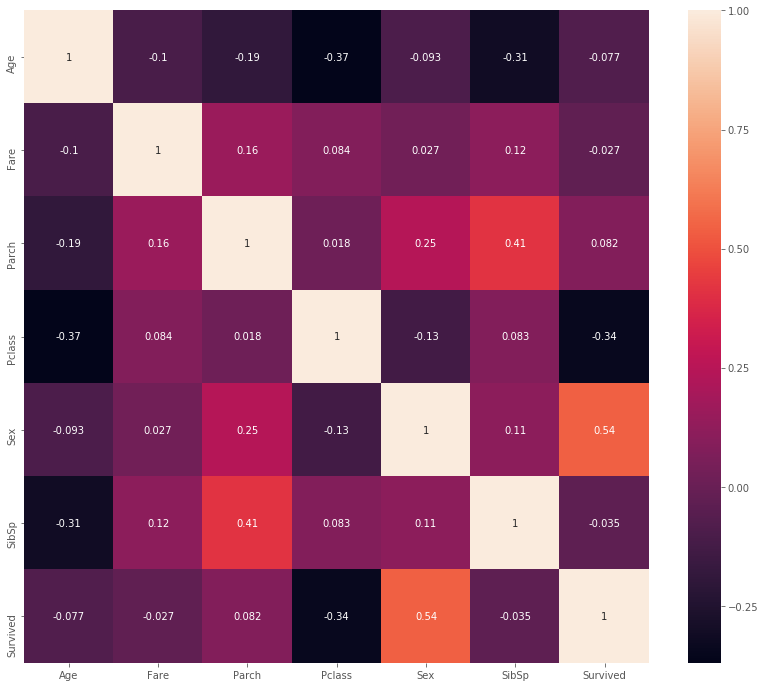

In [92]:
plt.figure(figsize=(14,12))
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
cor_matrix = data.drop('PassengerId', axis=1).corr()
print(cor_matrix)
sns.heatmap(cor_matrix, annot=True)

## Task 02: scatter plots for all pairs of features

  - Use sns.pairplot method to get the plots analogous to the one below for all (reasonable) pairs of features. Explain what you see :).

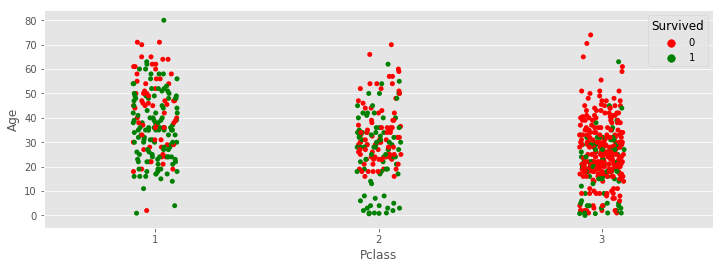

In [93]:
plt.figure(figsize=(12,4))
sns.stripplot(x="Pclass", y="Age", hue="Survived", data=data, palette= ['red','green'], jitter=True) # add 
#suoper pro disketri data rozhodi body aby se neprekrivaly

In [ ]:
### your code goes here


## Web scrapping with Python and pandas (1st homework)
          
### Tips:
   - Use `import requests` to get HTML sourse of a given `url`: 
      - `r = requests.get(url)`
      - `html = r.text`
   - Use `pandas.read_html(r.text)` to save content of all `<table>`'s as pandas DataFrames:
      - `list_of_data_frames = pd.read_html(html,flavor='html5lib')`
   - Use `from bs4 import BeautifulSoup` for html parsing.

In [95]:
import requests
from bs4 import BeautifulSoup

### Example of simple web scrapping

The aim is to download all data availale here (http://kap.ujak.cz/index.php) and store them in pandas DataFrame.

In [96]:
# url with search form
url = 'http://kap.ujak.cz/index.php?strana={}'
# setting POST variables to simulate (use developer mode of your browser)
data = {
    'typ' : 'kap',
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_all = pd.DataFrame()
for prace in ['BP', 'DP']:
    data['prace'] = prace
    r = requests.post(url, data)
    r.encoding='cp1250'
    ldf = pd.read_html(r.text,flavor='html5lib', header=0)
    df = ldf[0]
    strana = 30
    if data_all.shape[0] == 0:
        data_all = df.copy()
    else:
        data_all = pd.concat([data_all,df], ignore_index=True)
    while df.shape[0] > 0:
        if data_all.shape[0] > 200: # just to prevent from downloading all data
            break
        print(url.format(strana))
        r = requests.post(url.format(strana), data)
        r.encoding='cp1250'
        ldf = pd.read_html(r.text,flavor='html5lib', header=0)
        df = ldf[0]
        strana = strana + 30
        data_all = pd.concat([data_all,df], ignore_index=True)

http://kap.ujak.cz/index.php?strana=30
http://kap.ujak.cz/index.php?strana=60
http://kap.ujak.cz/index.php?strana=90
http://kap.ujak.cz/index.php?strana=120
http://kap.ujak.cz/index.php?strana=150
http://kap.ujak.cz/index.php?strana=180


In [97]:
dataUJAK = pd.read_csv('ujak.csv', index_col=0)
display(dataUJAK.head())
dataUJAK[dataUJAK['Rok'] > 2000].groupby(['Název práce']).size().sort_values(ascending=False)

,Autor,Název práce,Vedoucí,Rok,Typ práce
0,Abdrakhmanova Aizhan,Vliv médií na děti a mládež v Kazachstánu,"Svobodová Alena, Doc. PhDr.; CSc.",2017,BP
1,Abdullayev Timur,Inflation: Kazakhstani and global tendencies,"Vacenovský Michal, Ing.; LL.M.",2011,BP
2,Abdussattarov Nursultan,Payment system od Kazakhstan: modern condition...,"Vacenovský Michal, Ing.; LL.M.",2011,BP
3,Ábelová Šárka,Rovné příležitosti mužů a žen na trhu práce (Z...,"Vacínová Marie, PhDr.; CSc.",2007,BP
4,Abrahámová Jaroslava,Nekalá soutěž v aplikační praxi soudů v ČR,"Rákosník Jakub, Doc. PhDr. JUDr; Ph.D.",2008,BP


Název práce
Mezilidské vztahy na pracovišti                                                         56
Vliv rodiny na zdravý duševní vývoj dítěte                                              51
Domácí násilí                                                                           33
Specifické poruchy učení                                                                32
Kvalita života seniorů                                                                  31
Syndrom vyhoření                                                                        28
Vzdělávání seniorů                                                                      28
Systém vzdělávání a rozvoj lidských zdrojů v organizaci                                 27
Vedení týmu                                                                             27
Motivace, hodnocení a odměňování pracovníků v organizaci                                25
Dieťa postihnuté autizmom - možnosti výchovy a vzdelávania                    